In [23]:
# Import the necessary packages
import osmnx as ox
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Define local parameters for the EPSG and area for respective urban area
epsg = "EPSG:27700"
area = "Greater Manchester"

In [25]:
# Import population grid of respective urban area
popgrid = gpd.read_file('popgridmanchesternew.gpkg')

In [26]:
# Read the buffer geopackage file
buffer_gdkg = gpd.read_file('bufferintersect_gdf.gpkg')

In [27]:
# Download the land use data for the urban area
land_use = ox.geometries_from_place(area, tags={'landuse': True})
land_use = land_use.to_crs(epsg)
land_use = land_use.reset_index()

In [28]:
# Initialize an empty list to store the calculated diversity scores
diversity_scores = []

In [29]:
for index, row in popgrid.iterrows():
    # Extract the geometry of the population grid
    grid_geometry = row.geometry

    # Find the corresponding buffer polygon from the buffer geopackage
    buffer_polygon = buffer_gdkg.iloc[index]['geometry']

    # Intersect the land use data with the buffer polygon
    land_use_within_buffer = land_use[land_use.intersects(buffer_polygon)]

    # Calculate the frequency of each land use category within the buffer
    land_use_counts = land_use_within_buffer['landuse'].value_counts()

    # Calculate the probability of each land use category
    land_use_probs = land_use_counts / land_use_counts.sum()

    # Calculate the Shannon diversity score
    diversity_score = -np.sum(land_use_probs * np.log(land_use_probs))

    # Append the diversity score to the list
    diversity_scores.append(diversity_score)

In [30]:
popgrid['land_diversity'] = diversity_scores

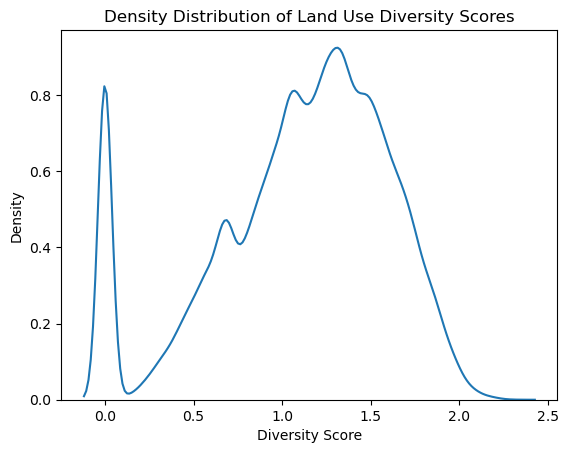

In [31]:
# Plot the density distribution of diversity scores
sns.kdeplot(popgrid['land_diversity'])
plt.xlabel('Diversity Score')
plt.ylabel('Density')
plt.title('Density Distribution of Land Use Diversity Scores')
plt.show()

In [34]:
popgrid.to_file('popgridmanchesternew2.gpkg', driver='GPKG')